### Importing Libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 29.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 34.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 35.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use upd

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

2025-08-11 16:13:43.165729: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-11 16:13:43.239191: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-11 16:13:45.096209: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


TensorFlow Version: 2.19.0
GPU Available: []


In [ ]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print("=" * 80)
print("📊 DATASET SHAPE INFORMATION")
print("=" * 80)
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

📊 DATASET SHAPE INFORMATION
Training set shape: (42000, 785)
Test set shape: (28000, 784)
Sample submission shape: (28000, 2)


### Train Model

In [ ]:
from preprocessing import processData
from model import trainModel

In [ ]:
X_train, y_train, X_val, y_val, datagen, X_test = processData(train_df, test_df)

In [ ]:
model, history = trainModel(X_train, y_train, X_val, y_val, datagen)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             

 Total params: 324,842 (1.24 MB)

 Trainable params: 323,434 (1.23 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6573 - loss: 1.1029 
Epoch 1: val_accuracy improved from -inf to 0.14667, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 56s 176ms/step - accuracy: 0.6579 - loss: 1.1008 - val_accuracy: 0.1467 - val_loss: 9.3277 - learning_rate: 0.0010
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9553 - loss: 0.1497 
Epoch 2: val_accuracy improved from 0.14667 to 0.97746, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 182ms/step - accuracy: 0.9553 - loss: 0.1497 - val_accuracy: 0.9775 - val_loss: 0.0793 - learning_rate: 0.0010
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9688 - loss: 0.1023 
Epoch 3: val_accuracy improved from 0.97746 to 0.98794, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 52s 186ms/step - accuracy: 0.9688 - loss: 0.1023 - val_accuracy: 0.9879 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9777 - loss: 0.0749 
Epoch 4: val_accuracy did not improve from 0.98794
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 183ms/step - accuracy: 0.9777 - loss: 0.0749 - val_accuracy: 0.9840 - val_loss: 0.0493 - learning_rate: 0.0010
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9815 - loss: 0.0625 
Epoch 5: val_accuracy did not improve from 0.98794
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 182ms/step - accuracy: 0.9815 - loss: 0.0625 - val_accuracy: 0.9875 - val_loss: 0.0381 - learning_rate: 0.0010
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9797 - loss: 0.0662 
Epoch 6: val_accuracy improved from 0.98794 to 0.99000, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 53s 189ms/step - accuracy: 0.9797 - loss: 0.0662 - val_accuracy: 0.9900 - val_loss: 0.0339 - learning_rate: 0.0010
Epoch 7/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9843 - loss: 0.0551 
Epoch 7: val_accuracy improved from 0.99000 to 0.99143, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 50s 180ms/step - accuracy: 0.9843 - loss: 0.0551 - val_accuracy: 0.9914 - val_loss: 0.0319 - learning_rate: 0.0010
Epoch 8/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9856 - loss: 0.0467 
Epoch 8: val_accuracy did not improve from 0.99143
279/279 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - accuracy: 0.9856 - loss: 0.0467 - val_accuracy: 0.9895 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 9/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9846 - loss: 0.0491 
Epoch 9: val_accuracy did not improve from 0.99143
279/279 ━━━━━━━━━━━━━━━━━━━━ 50s 179ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9871 - val_loss: 0.0493 - learning_rate: 0.0010
Epoch 10/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9857 - loss: 0.0489 
Epoch 10: val_accuracy improved from 0.99143 to 0.99190, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 49s 177ms/step - accuracy: 0.9857 - loss: 0.0489 - val_accuracy: 0.9919 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 11/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9869 - loss: 0.0444 
Epoch 11: val_accuracy improved from 0.99190 to 0.99286, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - accuracy: 0.9869 - loss: 0.0444 - val_accuracy: 0.9929 - val_loss: 0.0232 - learning_rate: 0.0010
Epoch 12/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9867 - loss: 0.0421 
Epoch 12: val_accuracy did not improve from 0.99286
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 181ms/step - accuracy: 0.9867 - loss: 0.0421 - val_accuracy: 0.9925 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 13/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9862 - loss: 0.0482 
Epoch 13: val_accuracy did not improve from 0.99286
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 182ms/step - accuracy: 0.9862 - loss: 0.0482 - val_accuracy: 0.9905 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 14/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9875 - loss: 0.0408 
Epoch 14: val_accuracy improved from 0.99286 to 0.99333, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 182ms/step - accuracy: 0.9875 - loss: 0.0408 - val_accuracy: 0.9933 - val_loss: 0.0229 - learning_rate: 0.0010
Epoch 15/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9872 - loss: 0.0419 
Epoch 15: val_accuracy did not improve from 0.99333
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 184ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9919 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 16/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9884 - loss: 0.0346 
Epoch 16: val_accuracy improved from 0.99333 to 0.99444, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 52s 186ms/step - accuracy: 0.9884 - loss: 0.0345 - val_accuracy: 0.9944 - val_loss: 0.0219 - learning_rate: 0.0010
Epoch 17/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9883 - loss: 0.0345 
Epoch 17: val_accuracy improved from 0.99444 to 0.99476, saving model to best_model.h5


279/279 ━━━━━━━━━━━━━━━━━━━━ 53s 188ms/step - accuracy: 0.9883 - loss: 0.0345 - val_accuracy: 0.9948 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 18/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9906 - loss: 0.0320 
Epoch 18: val_accuracy did not improve from 0.99476
279/279 ━━━━━━━━━━━━━━━━━━━━ 49s 174ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.9922 - val_loss: 0.0280 - learning_rate: 0.0010
Epoch 19/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9913 - loss: 0.0291 
Epoch 19: val_accuracy did not improve from 0.99476
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 181ms/step - accuracy: 0.9913 - loss: 0.0291 - val_accuracy: 0.9940 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 20/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9917 - loss: 0.0301 
Epoch 20: val_accuracy did not improve from 0.99476
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 183ms/step - accuracy: 0.9917 - loss: 0.0301 - val_accuracy: 0.9938 - val_loss: 0.0253 - learning_rate: 0.001

279/279 ━━━━━━━━━━━━━━━━━━━━ 52s 185ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9963 - val_loss: 0.0162 - learning_rate: 5.0000e-04
Epoch 24/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9940 - loss: 0.0179 
Epoch 24: val_accuracy did not improve from 0.99635
279/279 ━━━━━━━━━━━━━━━━━━━━ 52s 186ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9956 - val_loss: 0.0196 - learning_rate: 5.0000e-04
Epoch 25/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9944 - loss: 0.0193 
Epoch 25: val_accuracy did not improve from 0.99635
279/279 ━━━━━━━━━━━━━━━━━━━━ 51s 182ms/step - accuracy: 0.9944 - loss: 0.0193 - val_accuracy: 0.9952 - val_loss: 0.0192 - learning_rate: 5.0000e-04
Epoch 26/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9935 - loss: 0.0212 
Epoch 26: val_accuracy did not improve from 0.99635
279/279 ━━━━━━━━━━━━━━━━━━━━ 52s 187ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.9960 - val_loss: 0.0169 - learning

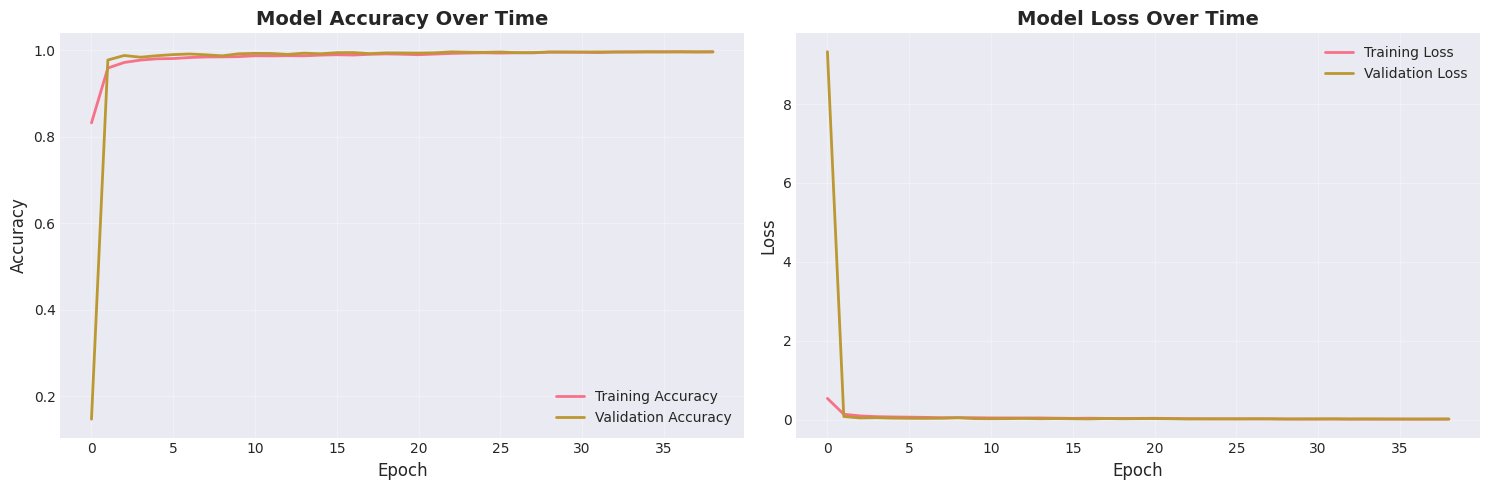


📊 Final Training Accuracy: 0.9964
📊 Final Validation Accuracy: 0.9963


In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"\n📊 Final Training Accuracy: {final_train_acc:.4f}")
print(f"📊 Final Validation Accuracy: {final_val_acc:.4f}")

In [11]:
rounded_labels=np.argmax(y_val, axis=1)

In [ ]:
# Make predictions on validation set
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
val_accuracy = accuracy_score(rounded_labels, y_pred)
print(f"🎯 Validation Accuracy: {val_accuracy:.4f}")

197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
🎯 Validation Accuracy: 0.9960


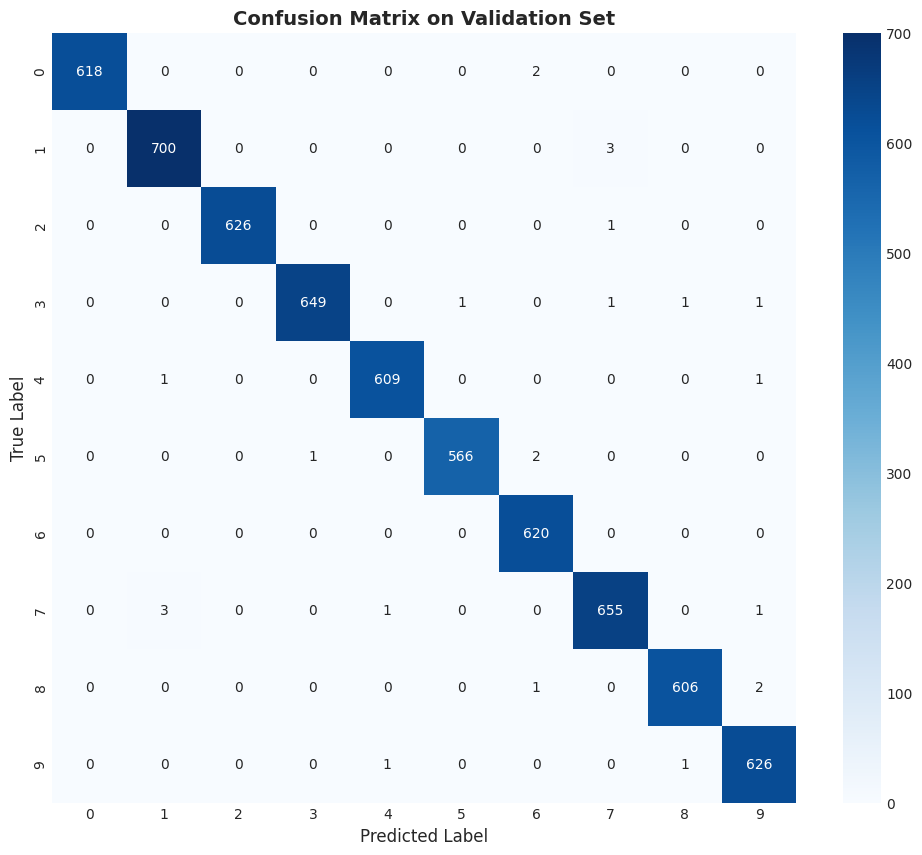

Digit 0 accuracy: 0.9968
Digit 1 accuracy: 0.9957
Digit 2 accuracy: 0.9984
Digit 3 accuracy: 0.9939
Digit 4 accuracy: 0.9967
Digit 5 accuracy: 0.9947
Digit 6 accuracy: 1.0000
Digit 7 accuracy: 0.9924
Digit 8 accuracy: 0.9951
Digit 9 accuracy: 0.9968


In [ ]:
# Create confusion matrix
cm = confusion_matrix(rounded_labels, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix on Validation Set', fontsize=14, fontweight='bold')
plt.show()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i in range(10):
    print(f"Digit {i} accuracy: {per_class_accuracy[i]:.4f}")

In [ ]:
# Generate detailed classification report
print("\n" + "=" * 80)
print("📋 CLASSIFICATION REPORT")
print("=" * 80)
print(classification_report(rounded_labels, y_pred, target_names=[str(i) for i in range(10)]))


📋 CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       0.99      1.00      1.00       703
           2       1.00      1.00      1.00       627
           3       1.00      0.99      1.00       653
           4       1.00      1.00      1.00       611
           5       1.00      0.99      1.00       569
           6       0.99      1.00      1.00       620
           7       0.99      0.99      0.99       660
           8       1.00      1.00      1.00       609
           9       0.99      1.00      0.99       628

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



Number of misclassified samples: 25


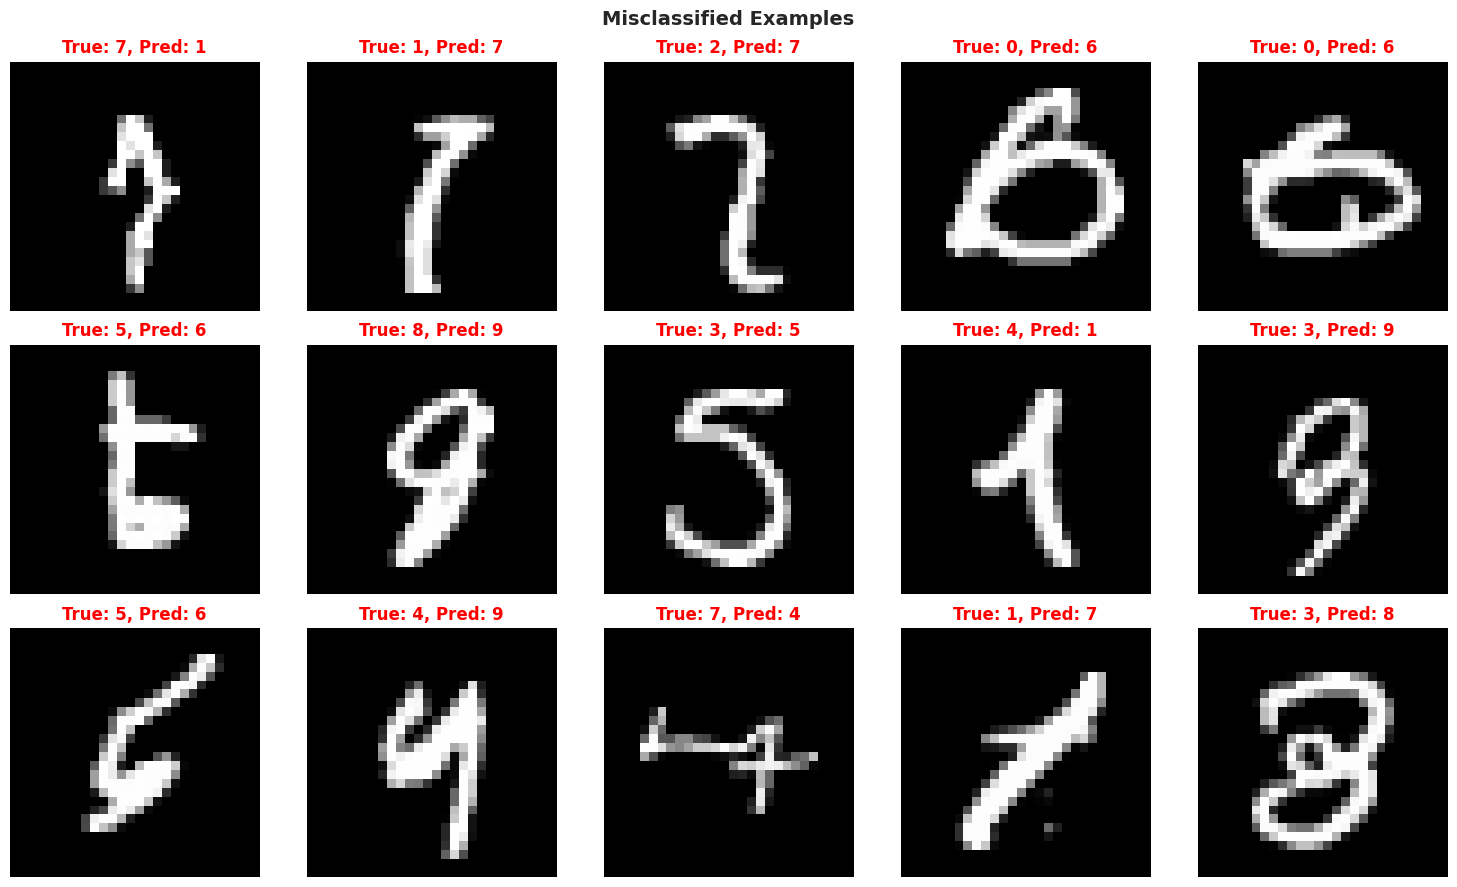

In [ ]:
# Find misclassified samples
misclassified_idx = np.where(rounded_labels != y_pred)[0]
print(f"Number of misclassified samples: {len(misclassified_idx)}")

# Visualize some misclassified examples
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    axes = axes.ravel()
    
    for i in range(min(15, len(misclassified_idx))):
        idx = misclassified_idx[i]
        axes[i].imshow(X_val[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True: {rounded_labels[idx]}, Pred: {y_pred[idx]}', 
                         color='red', fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle('Misclassified Examples', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

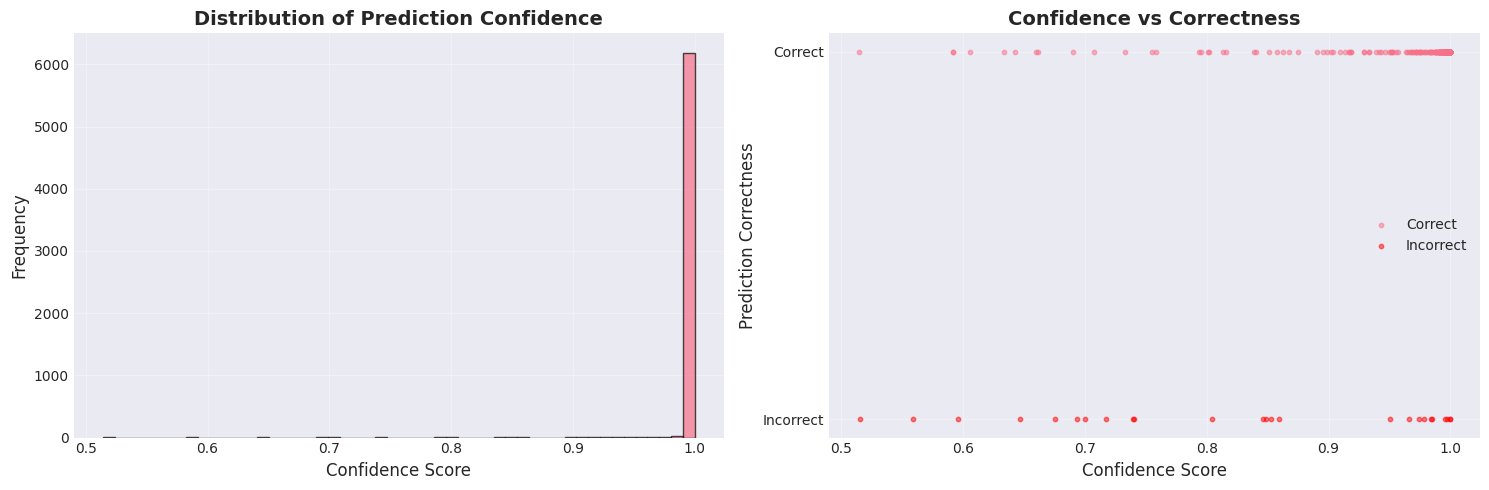

Average confidence for correct predictions: 0.9984
Average confidence for incorrect predictions: 0.8249


In [ ]:
# Analyze prediction confidence
confidence_scores = np.max(y_pred_probs, axis=1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of confidence scores
axes[0].hist(confidence_scores, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Confidence Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Prediction Confidence', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Confidence vs Accuracy
correct_predictions = (rounded_labels == y_pred)
axes[1].scatter(confidence_scores[correct_predictions], 
               np.ones(sum(correct_predictions)), 
               alpha=0.5, label='Correct', s=10)
axes[1].scatter(confidence_scores[~correct_predictions], 
               np.zeros(sum(~correct_predictions)), 
               alpha=0.5, label='Incorrect', s=10, color='red')
axes[1].set_xlabel('Confidence Score', fontsize=12)
axes[1].set_ylabel('Prediction Correctness', fontsize=12)
axes[1].set_title('Confidence vs Correctness', fontsize=14, fontweight='bold')
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['Incorrect', 'Correct'])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average confidence for correct predictions: {confidence_scores[correct_predictions].mean():.4f}")
print(f"Average confidence for incorrect predictions: {confidence_scores[~correct_predictions].mean():.4f}")

### Predict Test Set

In [ ]:
# Make predictions on test set
test_predictions_probs = model.predict(X_test)
test_predictions = np.argmax(test_predictions_probs, axis=1)

print(f"✅ Generated predictions for {len(test_predictions)} test samples")

875/875 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step
✅ Generated predictions for 28000 test samples


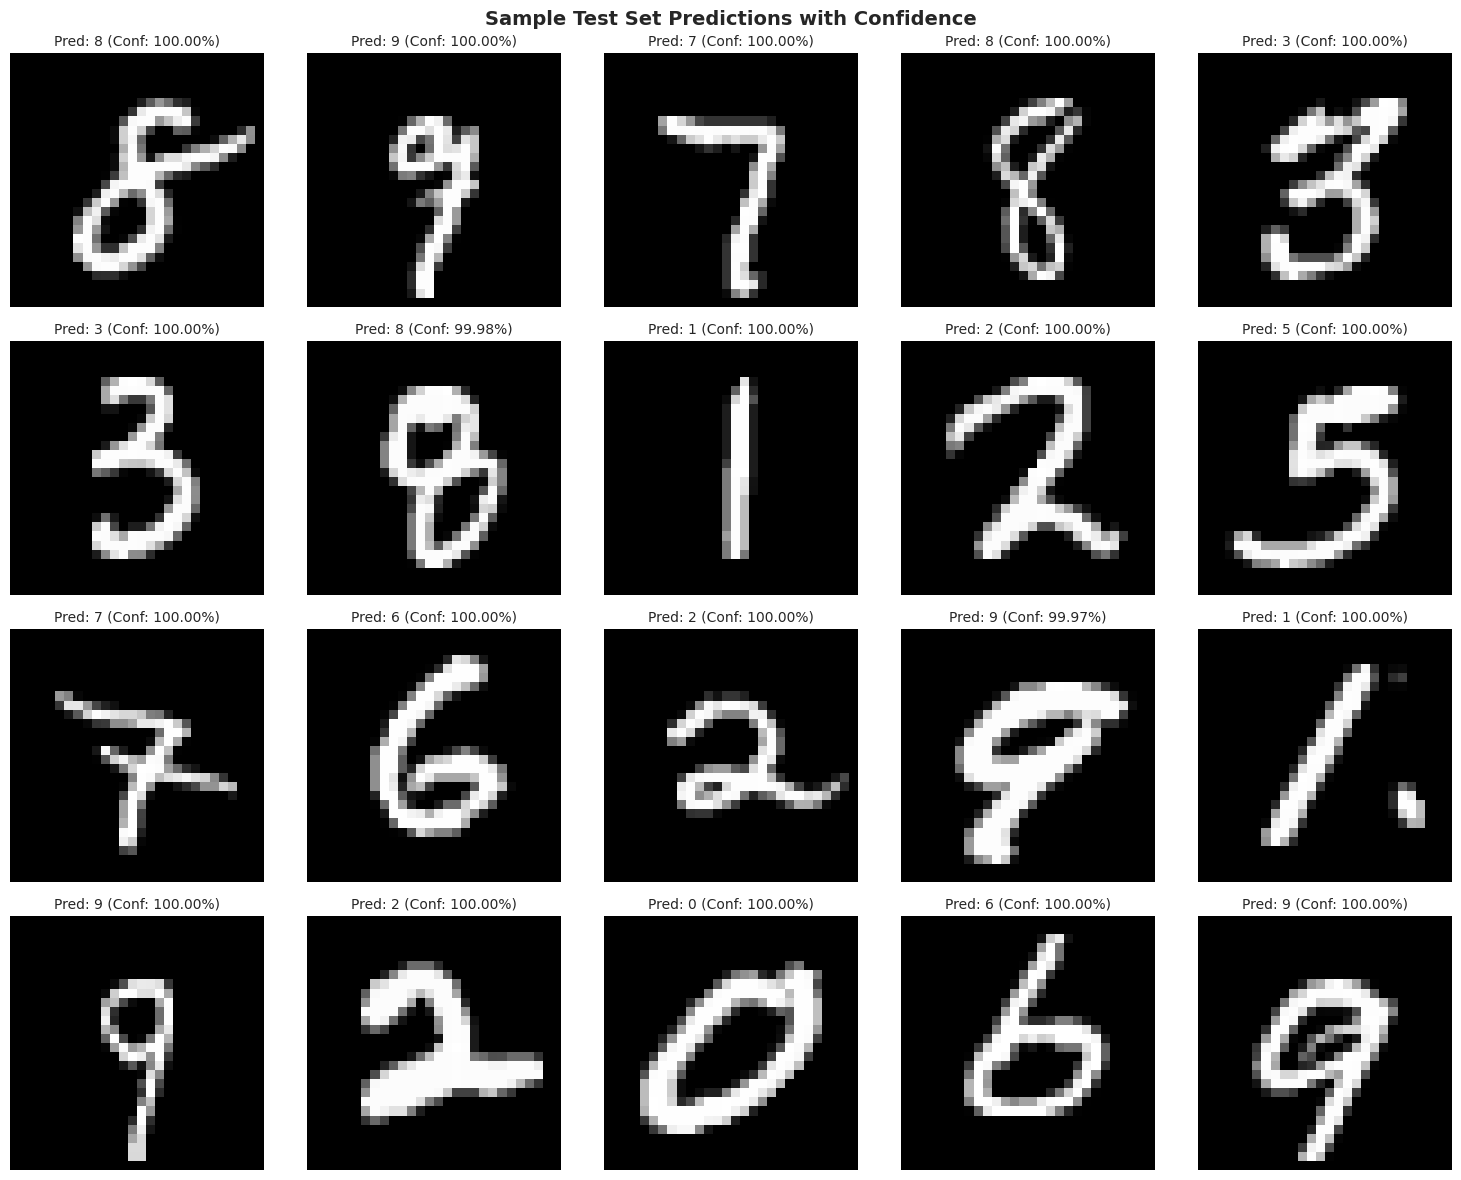

In [ ]:
# Visualize some test predictions with confidence
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.ravel()

for i in range(20):
    idx = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
    
    # Get prediction and confidence
    pred = test_predictions[idx]
    conf = test_predictions_probs[idx].max()
    
    axes[i].set_title(f'Pred: {pred} (Conf: {conf:.2%})', fontsize=10)
    axes[i].axis('off')

plt.suptitle('Sample Test Set Predictions with Confidence', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({
    'ImageId': range(1, len(test_predictions) + 1),
    'Label': test_predictions
})

# Display first few predictions
print("First 10 predictions:")
print(submission.head(10))

# Save submission file
submission.to_csv('submission.csv', index=False)
print(f"\n✅ Submission file created: 'submission.csv'")
print(f"Total predictions: {len(submission)}")

First 10 predictions:
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3

✅ Submission file created: 'submission.csv'
Total predictions: 28000


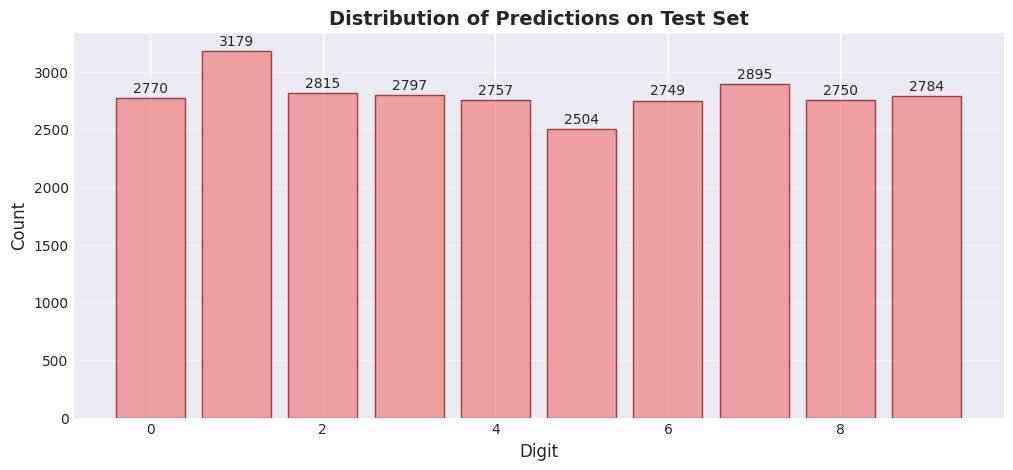


Prediction Statistics:
Most predicted digit: 1 (3179 times)
Least predicted digit: 5 (2504 times)


In [ ]:
# Analyze distribution of predictions
pred_counts = pd.Series(test_predictions).value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.bar(pred_counts.index, pred_counts.values, color='lightcoral', edgecolor='darkred', alpha=0.7)
plt.xlabel('Digit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Predictions on Test Set', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add count labels
for i, v in enumerate(pred_counts.values):
    plt.text(pred_counts.index[i], v + 50, str(v), ha='center', fontsize=10)

plt.show()

print("\nPrediction Statistics:")
print(f"Most predicted digit: {pred_counts.idxmax()} ({pred_counts.max()} times)")
print(f"Least predicted digit: {pred_counts.idxmin()} ({pred_counts.min()} times)")

In [ ]:
print("=" * 80)
print("🏆 FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 80)
print(f"Training Accuracy: {final_train_acc:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Number of parameters: {model.count_params():,}")
print(f"Expected Kaggle Score: ~{val_accuracy:.4f}")

🏆 FINAL MODEL PERFORMANCE SUMMARY
Training Accuracy: 0.9964
Validation Accuracy: 0.9960
Number of parameters: 324,842
Expected Kaggle Score: ~0.9960
